In [41]:
from warnings import filterwarnings
filterwarnings("ignore")

In [1]:
import pandas as pd 
A=pd.read_csv("C:/Users/Dell/Desktop/dk07/Neural_network/Conv_nn/digitsnpixels.csv")

# Data Profile

In [2]:
A.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
A.shape

(42000, 785)

In [4]:
A.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Visualization 1 image by converting into 28*28

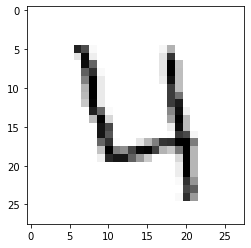

In [6]:
import matplotlib.pyplot as plt
X = A.drop("label",axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

In [7]:
X[3:4]    #image in the pixel format

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  28, 247,  17,   0

# Define X and Y

# convert Y into categorical Data

In [8]:
Y=A.label.values  #0-9 digits stored in y

In [9]:
Y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [42]:
X_scaled[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
Y_cat=pd.get_dummies(Y).values  #One Hot codding of Y
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [17]:
#import tensorflow as tf

In [18]:
#tf.keras.utils.to_categorical(Y)

# Scaled X

In [19]:
X_scaled=X/255

In [20]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Train and Test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [23]:
xtrain.shape

(33600, 784)

In [24]:
xtest.shape

(8400, 784)

In [25]:
xtrain=xtrain.reshape(33600,28,28,1)
xtest=xtest.reshape(8400,28,28,1)

In [26]:
xtrain.shape

(33600, 28, 28, 1)

In [27]:
xtest.shape

(8400, 28, 28, 1)

# Create CNN

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [30]:
nn = Sequential()

nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())

nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))

In [31]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [32]:
nn.fit(xtrain,ytrain,epochs=5,batch_size=64)

Epoch 1/5
525/525 [==============================] - 29s 31ms/step - loss: 0.1879 - accuracy: 0.9424
Epoch 2/5
525/525 [==============================] - 16s 31ms/step - loss: 0.0642 - accuracy: 0.9790
Epoch 3/5
525/525 [==============================] - 16s 30ms/step - loss: 0.0384 - accuracy: 0.9868
Epoch 4/5
525/525 [==============================] - 16s 31ms/step - loss: 0.0262 - accuracy: 0.9910
Epoch 5/5
525/525 [==============================] - 16s 31ms/step - loss: 0.0215 - accuracy: 0.9921


In [33]:
pred_prob = nn.predict(xtest)

In [34]:
pred_prob

array([[5.35715028e-09, 9.99998569e-01, 5.72258827e-08, ...,
        1.35599649e-07, 6.98710153e-07, 2.26361891e-07],
       [3.04647021e-14, 1.18464794e-10, 2.66660310e-13, ...,
        5.30095221e-08, 2.39800194e-11, 2.98376861e-08],
       [1.66073619e-07, 1.19495596e-08, 8.74685645e-01, ...,
        1.01516935e-05, 1.03881739e-01, 1.70593970e-02],
       ...,
       [9.99999166e-01, 1.12003858e-10, 9.39539717e-08, ...,
        2.94963498e-11, 7.34661171e-07, 1.03838946e-08],
       [2.93723552e-08, 9.99119461e-01, 1.30593062e-05, ...,
        2.07410858e-06, 1.29938871e-05, 3.72661343e-05],
       [1.10270571e-13, 3.11909434e-13, 9.99998927e-01, ...,
        1.10604921e-08, 1.09267467e-06, 1.04515852e-09]], dtype=float32)

In [35]:
from numpy import argmax
pred = argmax(pred_prob,axis=1)

# Making Prediction

In [39]:
pred

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [36]:
ytest = argmax(ytest,axis=1)

In [38]:
ytest

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

# Model Accuracy

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9826190476190476